### Importing Libraries

In [1]:
import pandas as pd #basic data operations 
import numpy as np
import re #for using regex functions
import seaborn as sns
import matplotlib.pyplot as plt # for visualization of data
from matplotlib import style   # to set style for the plots
style.use('ggplot') # ggplot is used here 
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
text_df = pd.read_csv('TSA-Preprocessing-dropped.csv')  #to load the data
text_df = text_df.sample(n=5000,replace=False)

In [3]:
text_df.head() 

,text,polarity,sentiment
186922,people get pfizers twoshot vaccine may still c...,0.0,Neutral
53044,canadaopcw embarrassing stealing oil starving ...,-0.3,Negative
61494,done oxfordastrazeneca 1st dose feeling rather...,0.0,Neutral
67762,two hours moderna vaccine still superpowers im...,-0.5,Negative
42976,yo shit joke arm sore af lol moderna,0.3,Positive


In [4]:
text_df

,text,polarity,sentiment
186922,people get pfizers twoshot vaccine may still c...,0.000000,Neutral
53044,canadaopcw embarrassing stealing oil starving ...,-0.300000,Negative
61494,done oxfordastrazeneca 1st dose feeling rather...,0.000000,Neutral
67762,two hours moderna vaccine still superpowers im...,-0.500000,Negative
42976,yo shit joke arm sore af lol moderna,0.300000,Positive
...,...,...,...
187650,kamalaharris joebiden potus sir complaint refu...,-0.300000,Negative
89333,delhi hc imposes fine iam_juhi delta variant b...,0.005556,Positive
137083,002643 411048 30072021 47 dose1 pmc p apollo c...,0.000000,Neutral
96844,560057 age 18 90d1 86d2 slots covaxin 21062021...,0.000000,Neutral


### Count-Vectorization 


In [5]:
vect = CountVectorizer().fit(text_df['text'])

X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)
X

<5000x11382 sparse matrix of type '<class 'numpy.int64'>'
	with 53148 stored elements in Compressed Sparse Row format>

### Splitting of Training and Testing Data


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (4000, 11382)
Size of y_train: (4000,)
Size of x_test: (1000, 11382)
Size of y_test: (1000,)


# Applying Models

# Logistic Regression

In [19]:
logreg = LogisticRegression()
logreg_model = logreg.fit(x_train, y_train)
logreg_pred = logreg_model.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.80%


In [20]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 32  54  14]
 [  6 559   9]
 [  3  66 257]]


              precision    recall  f1-score   support

    Negative       0.78      0.32      0.45       100
     Neutral       0.82      0.97      0.89       574
    Positive       0.92      0.79      0.85       326

    accuracy                           0.85      1000
   macro avg       0.84      0.69      0.73      1000
weighted avg       0.85      0.85      0.83      1000



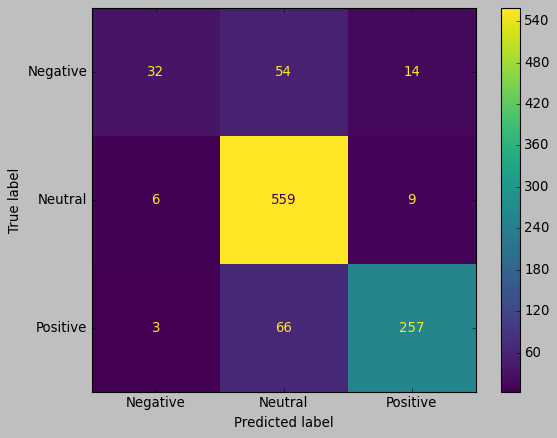

In [21]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

In [22]:
nb = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)

nb_model = nb.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, nb_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, nb_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, nb_pred))

Test Accuracy:  70.9 %


[[ 31  22  47]
 [ 38 396 140]
 [ 13  31 282]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.38      0.31      0.34       100
     Neutral       0.88      0.69      0.77       574
    Positive       0.60      0.87      0.71       326

    accuracy                           0.71      1000
   macro avg       0.62      0.62      0.61      1000
weighted avg       0.74      0.71      0.71      1000



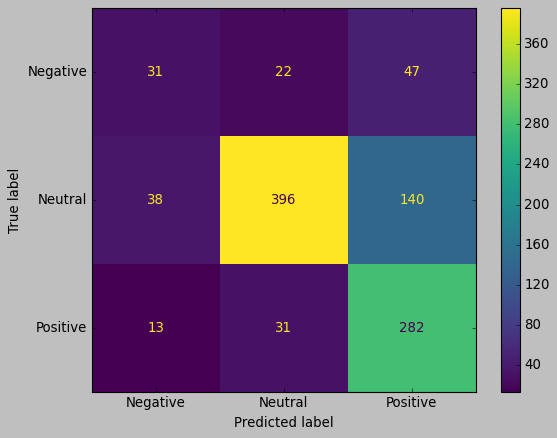

In [23]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot()

# SVM

In [24]:
# Train an SVM classifier on the training set
clf = LinearSVC()
sv_model = clf.fit(x_train, y_train)

# Evaluate the model's performance on the testing set
sv_pred = sv_model.predict(x_test)
print("Test Accuracy:", round(accuracy_score(y_test, sv_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, sv_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, sv_pred))

Test Accuracy: 87.1 %


[[ 47  40  13]
 [ 13 549  12]
 [  5  46 275]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.72      0.47      0.57       100
     Neutral       0.86      0.96      0.91       574
    Positive       0.92      0.84      0.88       326

    accuracy                           0.87      1000
   macro avg       0.83      0.76      0.79      1000
weighted avg       0.87      0.87      0.86      1000



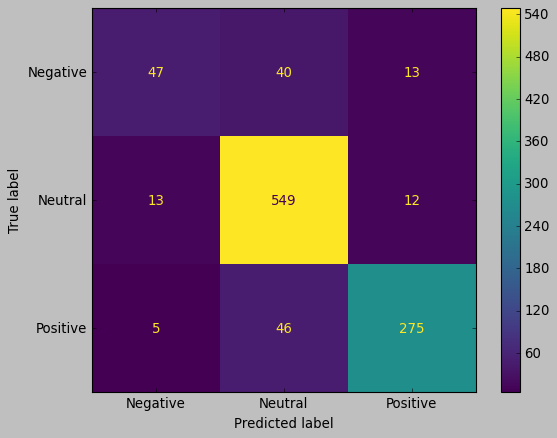

In [25]:
style.use('classic')
cm = confusion_matrix(y_test, sv_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

# KNN

In [26]:
kn = KNeighborsClassifier(n_neighbors=3)

kn_model = kn.fit(x_train, y_train)

kn_pred = kn_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, kn_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, kn_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, kn_pred,))

Test Accuracy:  65.9 %


[[ 10  87   3]
 [  1 566   7]
 [  0 243  83]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.91      0.10      0.18       100
     Neutral       0.63      0.99      0.77       574
    Positive       0.89      0.25      0.40       326

    accuracy                           0.66      1000
   macro avg       0.81      0.45      0.45      1000
weighted avg       0.74      0.66      0.59      1000



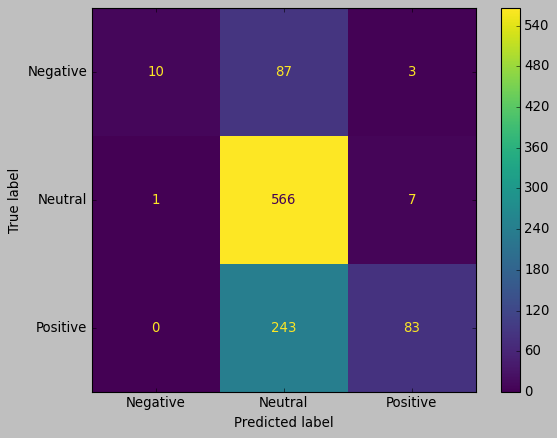

In [27]:
style.use('classic')
cm = confusion_matrix(y_test, kn_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=kn.classes_)
disp.plot()

# Decision Tree

In [28]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth = 1000, splitter='best', random_state=100)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, dtc_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, dtc_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, dtc_pred))

Test Accuracy:  87.4 %


[[ 55  28  17]
 [  9 553  12]
 [  6  54 266]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.79      0.55      0.65       100
     Neutral       0.87      0.96      0.91       574
    Positive       0.90      0.82      0.86       326

    accuracy                           0.87      1000
   macro avg       0.85      0.78      0.81      1000
weighted avg       0.87      0.87      0.87      1000



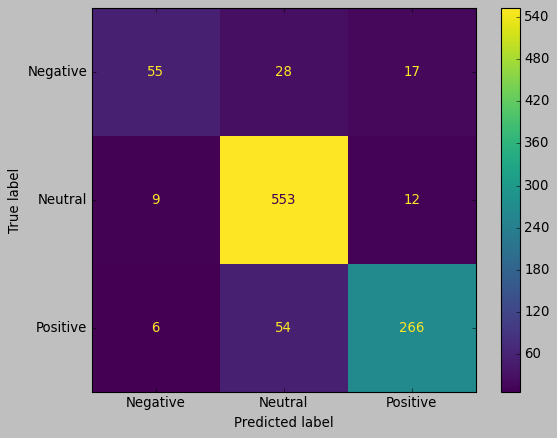

In [29]:
style.use('classic')
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtc.classes_)
disp.plot()

# Random Forest

In [30]:
rf = RandomForestClassifier(max_depth = 2000, random_state=42,n_estimators=100,criterion="entropy")

# Train the model on the training set
rf_model = rf.fit(x_train, y_train)

In [31]:
# Make predictions on the test set
rf_pred = rf.predict(x_test)

print("Test accuracy:", round(accuracy_score(y_test, rf_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, rf_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, rf_pred))

Test accuracy: 84.6 %


[[ 30  57  13]
 [  0 571   3]
 [  3  78 245]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.91      0.30      0.45       100
     Neutral       0.81      0.99      0.89       574
    Positive       0.94      0.75      0.83       326

    accuracy                           0.85      1000
   macro avg       0.89      0.68      0.73      1000
weighted avg       0.86      0.85      0.83      1000



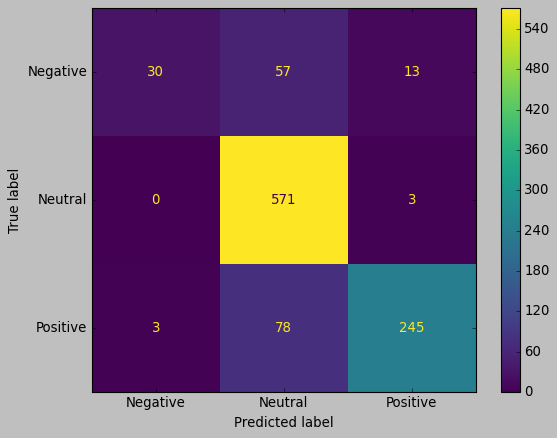

In [32]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot()

#  Store the model names and their accuracy in a dataframe

In [33]:
res = []
res = pd.DataFrame(res)
res["models"] = ["Logistic Regression", "Naive Bayes","SVM",  "KNN", "Decision Tree", "Random Forest"]
res["accuracy"] = [ round(accuracy_score(y_test, logreg_pred)*100,2),round(accuracy_score(y_test, nb_pred)*100,2),round(accuracy_score(y_test, sv_pred)*100,2), round(accuracy_score(y_test, kn_pred)*100,2), round(accuracy_score(y_test, dtc_pred)*100,2), round(accuracy_score(y_test, rf_pred)*100,2)]
res = res.sort_values("accuracy", ascending=False).reset_index(drop=True)
res.to_csv('model_results_150k.csv', index=False)
res

,models,accuracy
0,Decision Tree,87.4
1,SVM,87.1
2,Logistic Regression,84.8
3,Random Forest,84.6
4,Naive Bayes,70.9
5,KNN,65.9


#  Save the traied models locally

In [34]:
import joblib

joblib.dump(logreg_model, 'Trained Models_5k/logregr_model.pkl')
joblib.dump(nb_model, 'Trained Models_5k/nb_model.pkl')
joblib.dump(sv_model, 'Trained Models_5k/svm_model.pkl')
joblib.dump(kn_model, 'Trained Models_5k/kn_model.pkl')
joblib.dump(dtc_model, 'Trained Models_5k/dtc_model.pkl')
joblib.dump(rf_model, 'Trained Models_5k/rf_model.pkl')

['Trained Models_5k/rf_model.pkl']